In [32]:
%load_ext autoreload
from sklearn.datasets import load_digits
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from visuals import *
from GaussianPredictor import GaussianDigitClassifier

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading Data

In [33]:
X, y = load_digits(return_X_y = True)
print(f"X array shape: {X.shape} \t y array shape: {y.shape}")

X array shape: (1797, 64) 	 y array shape: (1797,)


## Standarizing data

In [34]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

print(f"No. of features: {len(scaler.mean_)}")
print(f"Mean: {scaler.mean_}")

No. of features: 64
Mean: [0.00000000e+00 3.03839733e-01 5.20478575e+00 1.18358375e+01
 1.18480801e+01 5.78185865e+00 1.36227045e+00 1.29660545e-01
 5.56483027e-03 1.99387869e+00 1.03823038e+01 1.19794101e+01
 1.02793545e+01 8.17584864e+00 1.84641068e+00 1.07957707e-01
 2.78241514e-03 2.60155815e+00 9.90317195e+00 6.99276572e+00
 7.09794101e+00 7.80634391e+00 1.78853645e+00 5.00834725e-02
 1.11296605e-03 2.46967168e+00 9.09126322e+00 8.82136895e+00
 9.92710072e+00 7.55147468e+00 2.31775181e+00 2.22593211e-03
 0.00000000e+00 2.33945465e+00 7.66722315e+00 9.07178631e+00
 1.03016138e+01 8.74401781e+00 2.90929327e+00 0.00000000e+00
 8.90372844e-03 1.58375070e+00 6.88146912e+00 7.22815804e+00
 7.67223150e+00 8.23650529e+00 3.45631608e+00 2.72676683e-02
 7.23427935e-03 7.04507513e-01 7.50695604e+00 9.53923205e+00
 9.41624930e+00 8.75848637e+00 3.72509738e+00 2.06455203e-01
 5.56483027e-04 2.79354480e-01 5.55759599e+00 1.20890373e+01
 1.18091263e+01 6.76405120e+00 2.06789093e+00 3.64496383e-0

# Plot Before standarizing data

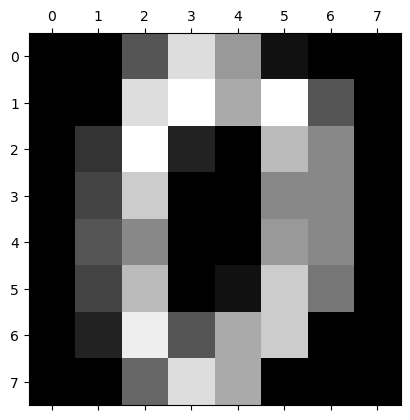

In [35]:
import matplotlib.pyplot as plt
plt.matshow(X[0].reshape(8,8), cmap="gray")
plt.show()

# Plotting after standarizing data

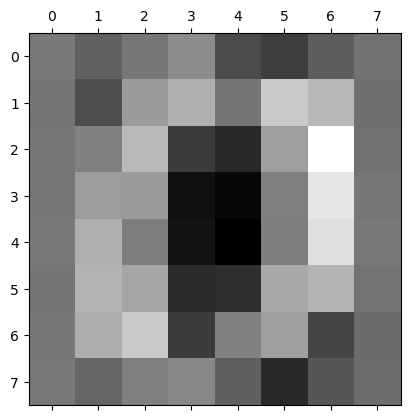

In [36]:
import matplotlib.pyplot as plt
plt.matshow(X_scaled[0].reshape(8,8), cmap="gray")
plt.show()

## Splitting Data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

X_test, X_val, y_test, y_val  = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)



In [38]:
print(f"No. of traning samples: {len(y_train)}")
print(f"No. of test samples: {len(y_test)}")
print(f"No. of validation samples: {len(y_val)}")

No. of traning samples: 1257
No. of test samples: 270
No. of validation samples: 270


## Visualizing any Two features to look for gaussian distributions along data

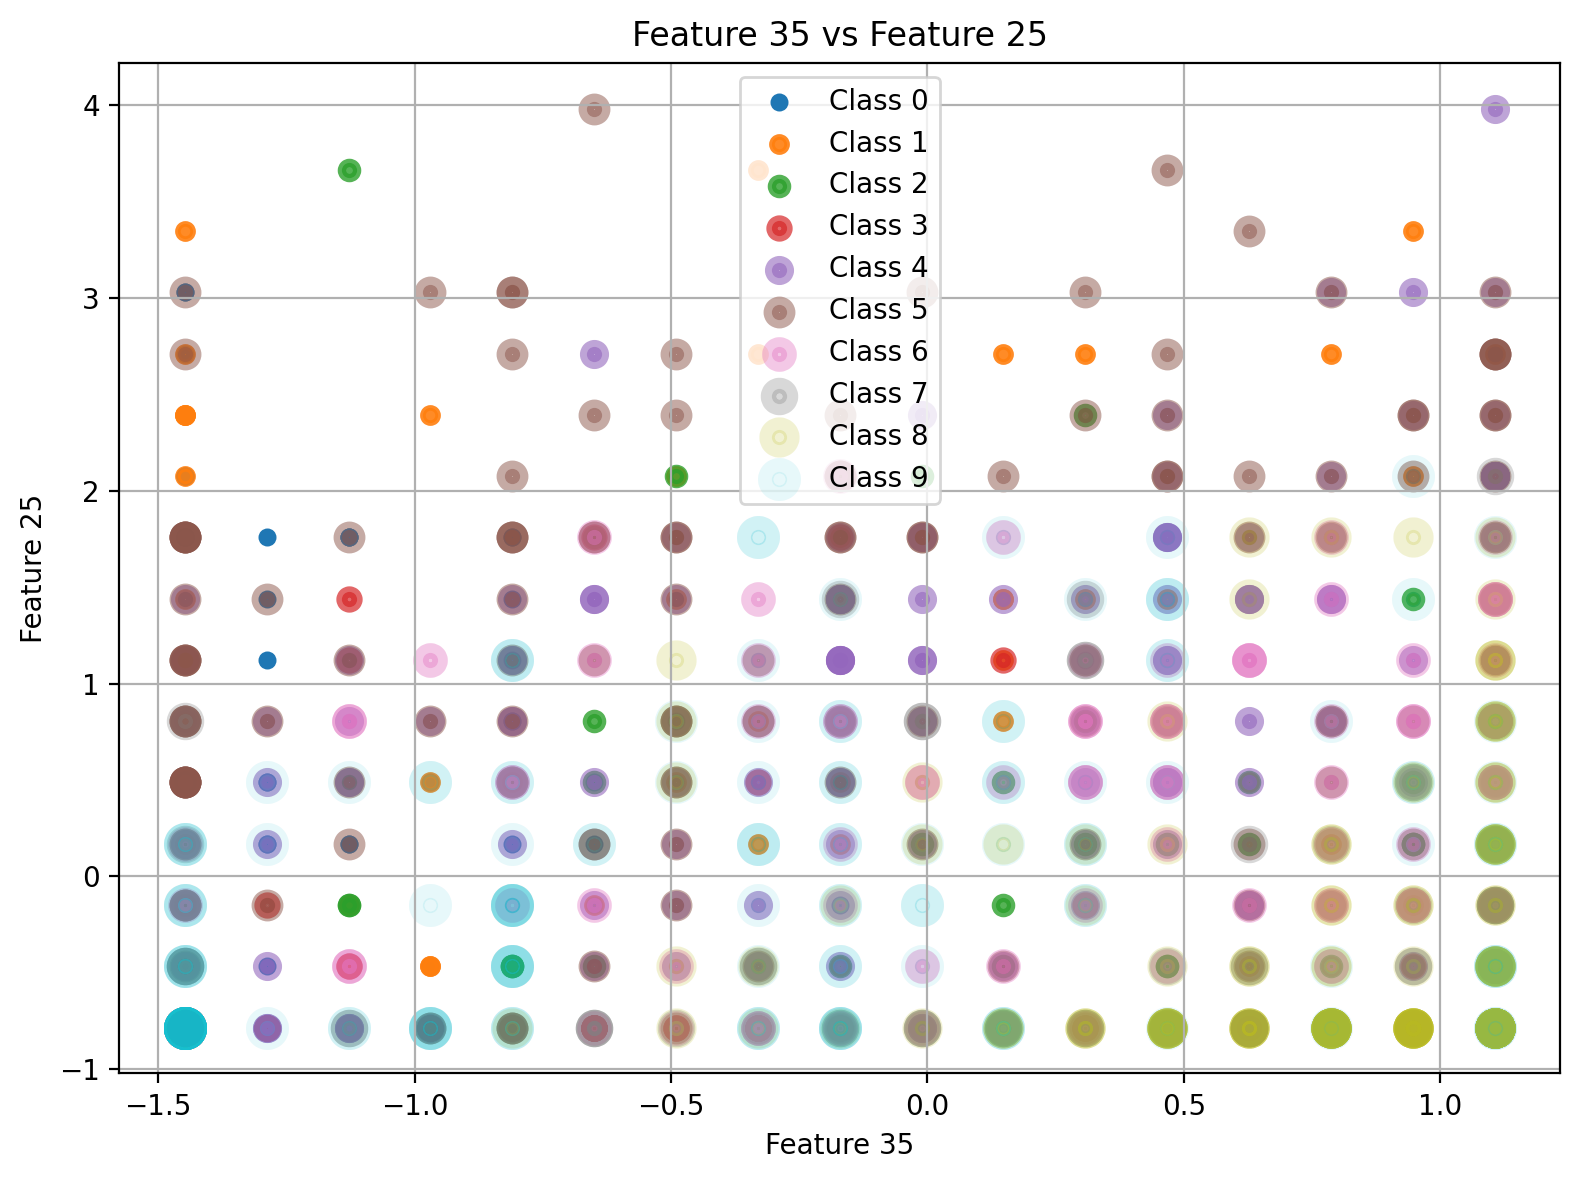

In [39]:
%autoreload 2
plot_two_features(X_scaled, y, 35, 25)

# Crating an Instance of the Custom made Classifier

In [40]:
%autoreload 2

classifier = GaussianDigitClassifier()

### Using the formula below to make our classification We need to calculate each term below ignoring the - Log(P(x)) term as it is redunandt in all classes so it's not needed
![Screenshot from 2025-12-07 13-34-04.png](<attachment:Screenshot from 2025-12-07 13-34-04.png>)
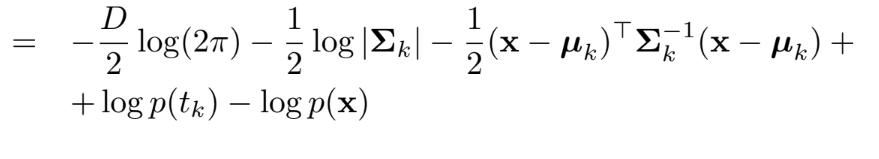

### Calulating the classs Priors ~ P(Tk)

In [41]:
classifier.calculateClassPriors(y_train)

number of 0 samples: 124 with prior probability: 0.09864757358790771
number of 1 samples: 127 with prior probability: 0.10103420843277645
number of 2 samples: 124 with prior probability: 0.09864757358790771
number of 3 samples: 128 with prior probability: 0.10182975338106603
number of 4 samples: 127 with prior probability: 0.10103420843277645
number of 5 samples: 127 with prior probability: 0.10103420843277645
number of 6 samples: 127 with prior probability: 0.10103420843277645
number of 7 samples: 125 with prior probability: 0.09944311853619729
number of 8 samples: 122 with prior probability: 0.09705648369132856
number of 9 samples: 126 with prior probability: 0.10023866348448687






### Calculating the Mean for each feature for every class

In [42]:
%autoreload 2
classifier.calculateMeans(X_train, y_train)

Mean Matrix is filled successfully






### Intiating 64*64 covariance matrix by zeros 
### By looping over each samples denoted as Xi and subtracting the features from their corresopnding means give by the sample class lable then doing outer product Xi * Xi T then adding the output matrix to our original Covariance Matrix


In [43]:
classifier.calculateCovarianceMatrix(X_train, y_train)

Covariance Matrix calculated successfully:
 [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.03069299  0.57142129 ... -0.0246498   0.02792633
  -0.03423713]
 [ 0.          0.57142129  0.96941249 ... -0.04335798  0.08770554
   0.07492597]
 ...
 [ 0.         -0.0246498  -0.04335798 ...  0.97621581  0.6129562
   0.19920172]
 [ 0.          0.02792633  0.08770554 ...  0.6129562   0.95725097
   0.50709628]
 [ 0.         -0.03423713  0.07492597 ...  0.19920172  0.50709628
   0.75390733]]


In [44]:
classifier.regularizeCovariance()

Covariance Matrix after regularization:
 [[ 2.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          3.03069299  0.57142129 ... -0.0246498   0.02792633
  -0.03423713]
 [ 0.          0.57142129  2.96941249 ... -0.04335798  0.08770554
   0.07492597]
 ...
 [ 0.         -0.0246498  -0.04335798 ...  2.97621581  0.6129562
   0.19920172]
 [ 0.          0.02792633  0.08770554 ...  0.6129562   2.95725097
   0.50709628]
 [ 0.         -0.03423713  0.07492597 ...  0.19920172  0.50709628
   2.75390733]]


# Adding the terms to get their as shown in the formula above to get the log of the posterior


In [14]:
classifier.calculateLogPosterior(X_test[0], 0)


The Log of the posterior log(p(t|x)) is calculated successfully without including the p(x) term:
 -101.18437738868097


-101.18437738868097

# Testing the model and Doing some predictions on some random validation samples

In [45]:
for i in range(1,len(X_val), 30):
    prediction = classifier.predictSample(X_test[i])
    print(f"Gaussian Classifer Prediction on Validation sample no. {i}: {prediction}")
    print(f"Acctual class for Validation sample no. {i}: {y_test[i]}")


Gaussian Classifer Prediction on Validation sample no. 1: 2
Acctual class for Validation sample no. 1: 1
Gaussian Classifer Prediction on Validation sample no. 31: 4
Acctual class for Validation sample no. 31: 4
Gaussian Classifer Prediction on Validation sample no. 61: 3
Acctual class for Validation sample no. 61: 3
Gaussian Classifer Prediction on Validation sample no. 91: 8
Acctual class for Validation sample no. 91: 8
Gaussian Classifer Prediction on Validation sample no. 121: 8
Acctual class for Validation sample no. 121: 8
Gaussian Classifer Prediction on Validation sample no. 151: 0
Acctual class for Validation sample no. 151: 0
Gaussian Classifer Prediction on Validation sample no. 181: 0
Acctual class for Validation sample no. 181: 0
Gaussian Classifer Prediction on Validation sample no. 211: 5
Acctual class for Validation sample no. 211: 1
Gaussian Classifer Prediction on Validation sample no. 241: 9
Acctual class for Validation sample no. 241: 9


## Generating The means for each number to give insights about our model

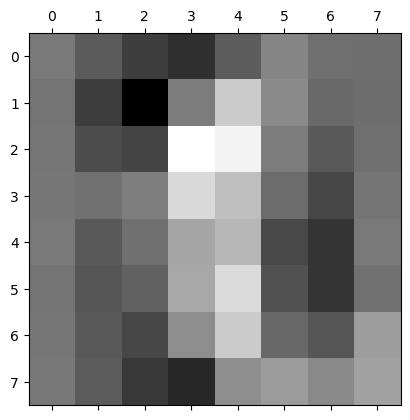

In [17]:
MeanMatrix = classifier.getMeanMatrix()
digitMeans = MeanMatrix[4].copy()
# MeansUnStandarized = scaler.inverse_transform(MeanMatrix)

plt.matshow(MeanMatrix[1].reshape(8,8) , cmap = 'gray')
plt.show()



At lambda = 1e-05
100 samples done
200 samples done
300 samples done
400 samples done
500 samples done
600 samples done
700 samples done
800 samples done
900 samples done
1000 samples done
1100 samples done
1200 samples done
100 samples done
200 samples done
At lambda = 7.742636826811278e-05
100 samples done
200 samples done
300 samples done
400 samples done
500 samples done
600 samples done
700 samples done
800 samples done
900 samples done
1000 samples done
1100 samples done
1200 samples done
100 samples done
200 samples done
At lambda = 0.0005994842503189409
100 samples done
200 samples done
300 samples done
400 samples done
500 samples done
600 samples done
700 samples done
800 samples done
900 samples done
1000 samples done
1100 samples done
1200 samples done
100 samples done
200 samples done
At lambda = 0.004641588833612777
100 samples done
200 samples done
300 samples done
400 samples done
500 samples done
600 samples done
700 samples done
800 samples done
900 samples done
1000 

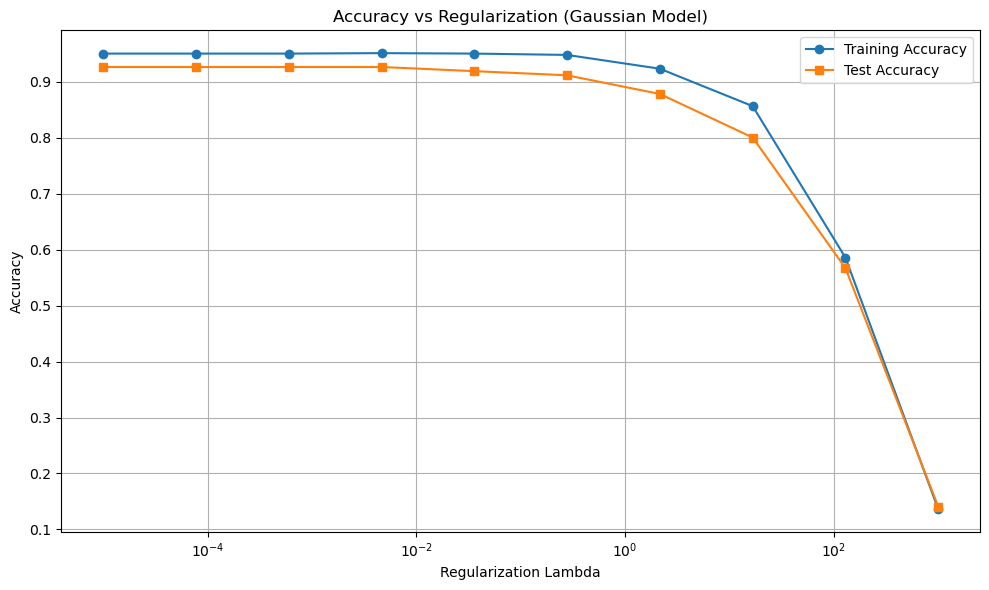

In [30]:
plot_gaussian_accuracies(classifier, X_train, y_train, X_test, y_test)